In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from scipy.stats import norm,zscore

In [3]:
%matplotlib inline
a1 = pd.read_csv("student-mat.csv")
a2 = pd.read_csv("student-por.csv")


In [4]:
df = pd.concat([a1,a2])

In [41]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1.0,1,3.0,6,5,NaN,10.0
1,GP,F,17,U,GT3,NaN,1,1,at_home,other,...,5,3,3,NaN,1,3.0,4,5,NaN,6.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2.0,3,3.0,10,7,6.0,NaN
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1.0,1,5.0,2,15,14.0,15.0
4,GP,F,16,U,GT3,NaN,3,3,other,other,...,4,3,2,NaN,2,5.0,4,6,10.0,NaN


In [72]:
df.shape

(1044, 33)

replace numerical value by coloum mean

In [42]:
df.G2 = df.G2.fillna(df.G2.mean())
df.G3 = df.G3.fillna(df.G3.mean())

In [43]:
df.Dalc = df.Dalc.interpolate()

 Replacing categorical missing value by its previous row value

In [44]:
df.higher = df.higher.ffill()
df.Pstatus = df.Pstatus.ffill()

In [45]:
df.head()
#handled missing values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1.0,1,3.0,6,5,11.241176,10.000000
1,GP,F,17,U,GT3,A,1,1,at_home,other,...,5,3,3,1.5,1,3.0,4,5,11.241176,6.000000
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2.0,3,3.0,10,7,6.000000,11.373164
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1.0,1,5.0,2,15,14.000000,15.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1.0,2,5.0,4,6,10.000000,11.373164


Text(0.5,1,'Gender of students')

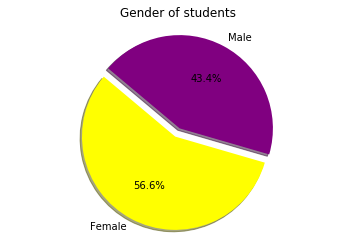

In [46]:
a=[]
b=[]
for i in df.sex:
    if(i =='F'):
        a.append(i)
    else:
        b.append(i)
sizes = [len(a),len(b)]
lables = 'Female','Male'
explode =(0.1,0)
colors = ['yellow', 'purple']
plt.pie(sizes, explode=explode, labels=lables, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Gender of students")

Text(0.5,1,'The distribution of ages of students we are dealing with.')

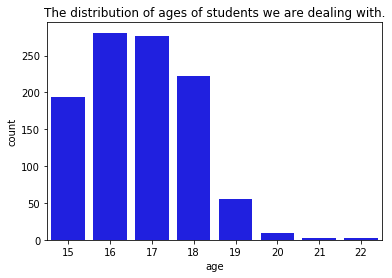

In [48]:
sns.countplot(x="age",data=df,color="blue")
plt.title("The distribution of ages of students we are dealing with.")

In [49]:
#t test for this!

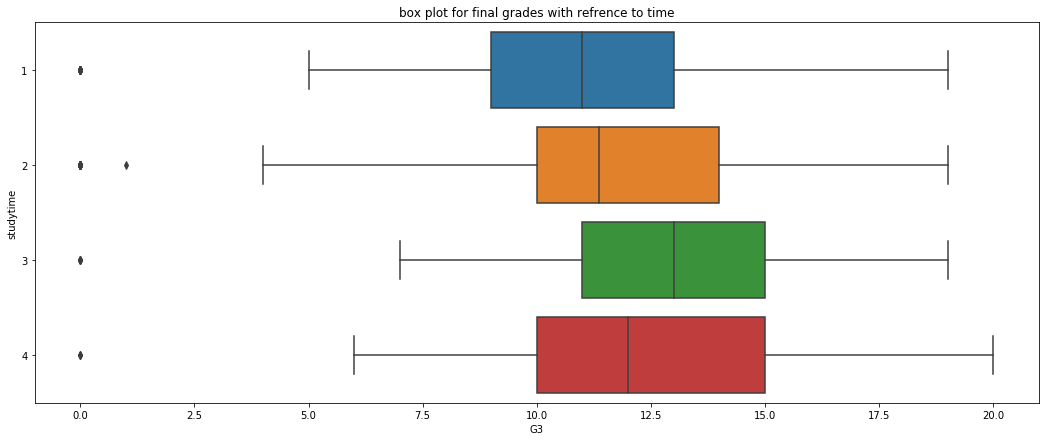

In [50]:
plt.figure(figsize=(18,7))
plt.title("box plot for final grades with refrence to time")
sns.boxplot(y="studytime" ,x="G3", orient="h",data=df,width=0.8 )
#more the study better where the results.

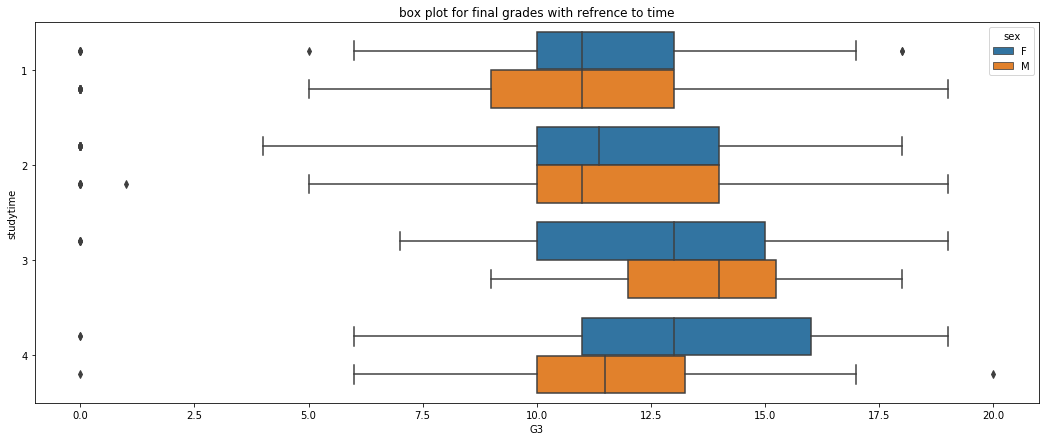

In [51]:
plt.figure(figsize=(18,7))
plt.title("box plot for final grades with refrence to time")
sns.boxplot(y="studytime" ,x="G3", orient="h",data=df,width=0.8,hue="sex" )
#more the study better where the results.

Text(0.5,1,'How many students want to ger higher education?')

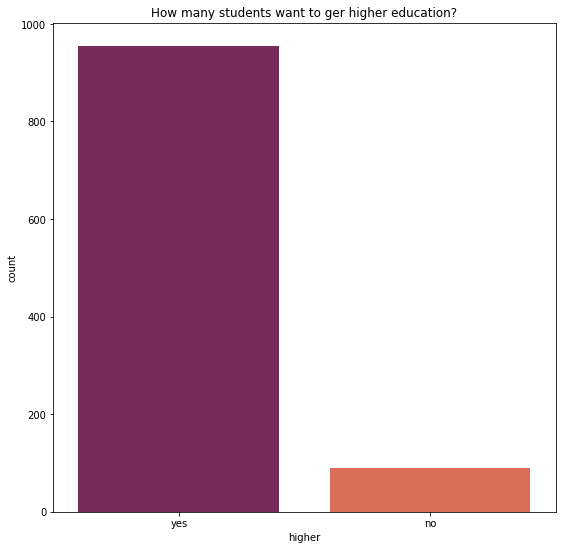

In [52]:
plt.figure(figsize=(9,9))
sns.countplot(x="higher", palette="rocket", data=df)
plt.title("How many students want to ger higher education?")

Text(0.5,1,'Having higher ambition effects?')

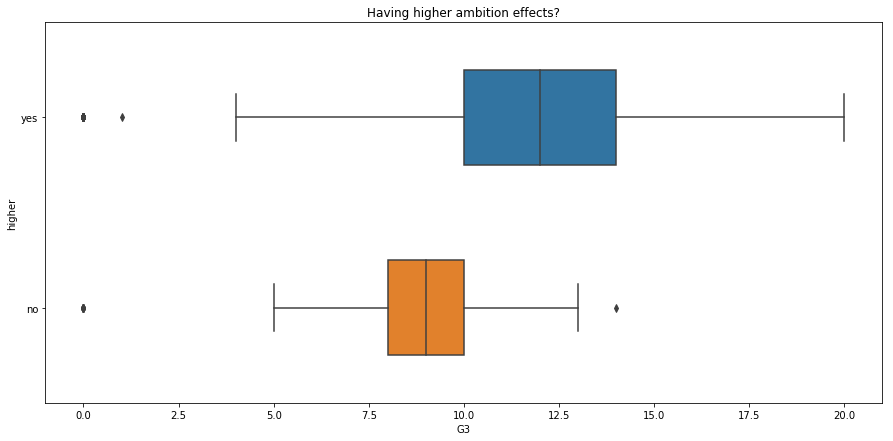

In [53]:
plt.figure(figsize=(15,7))
sns.boxplot(x="G3",y="higher",orient="h",data=df,width=0.5)
plt.title("Having higher ambition effects?")

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Text yticklabel objects>)

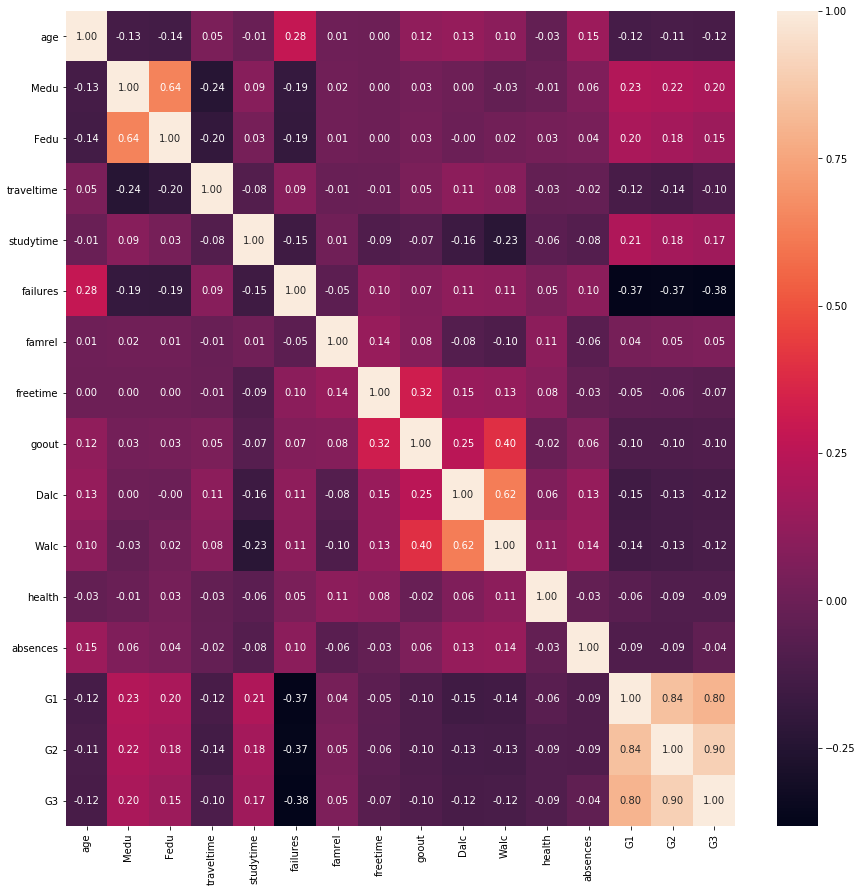

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

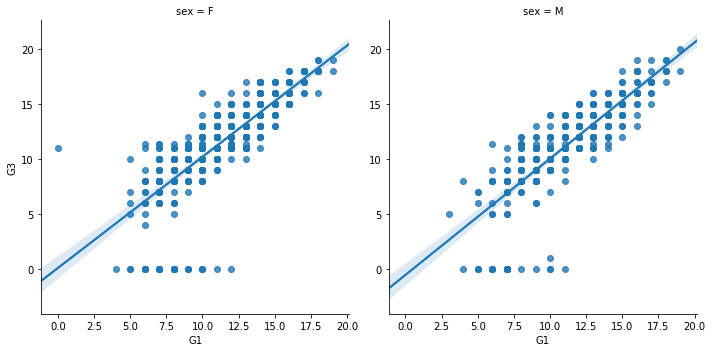

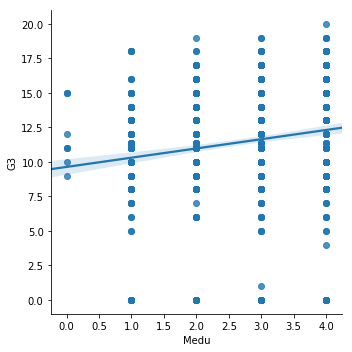

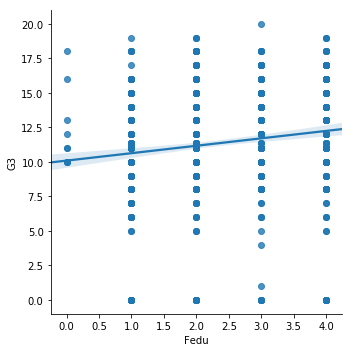

In [70]:
sns.lmplot(x='G1',y='G3',data=df,col='sex')
sns.lmplot(x='Medu',y='G3',data=df)
sns.lmplot(x='Fedu',y='G3',data=df)

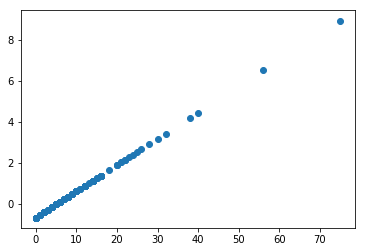

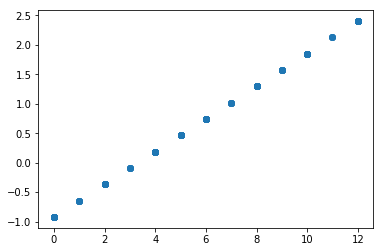

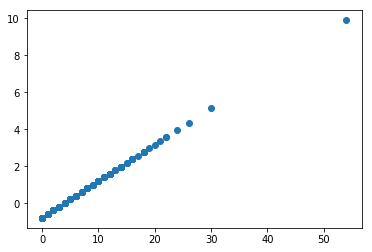

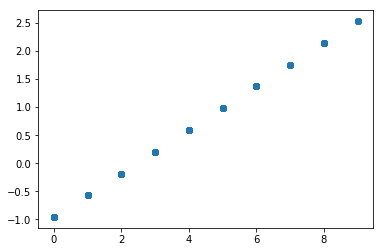

In [24]:
def check_normal(x):
    p=list(map(lambda a:((a-0.5)/len(x)),x))
    z=zscore(x) 
    plt.scatter(x,z)
    plt.show()
def check_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    lower = q1 - ((q3-q1)*1.5)
    upper = q1 + ((q3-q1)*1.5)
    return list(filter(lambda a:lower<=a<=upper,x))
check_normal(df[(df.romantic == 'yes')]['absences'])
check_normal(check_outliers(df[(df.romantic == 'yes')]['absences']))
check_normal(df[(df.romantic == 'no')]['absences'])
check_normal(check_outliers(df[(df.romantic == 'no')]['absences']))

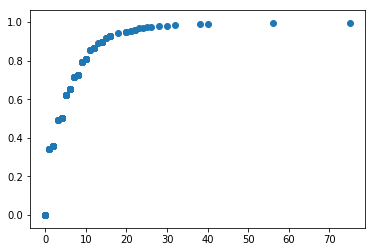

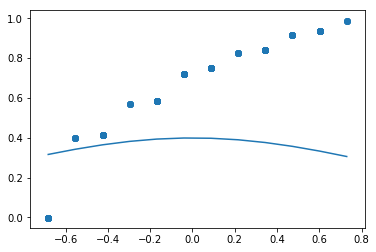

In [15]:
def check_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    lower = q1 - ((q3-q1)*1.5)
    upper = q1 + ((q3-q1)*1.5)
    return list(filter(lambda a:lower<=a<=upper,x))
def normalize(x):
    mu = np.mean(x)
    sd = np.std(x)
    b=[]
    t =[]
    for i in x:
        t.append(i)
    t.sort()
    check_normal(t)
    for i in x:
        b.append((i-mu)/sd)
    b.sort()
    #check_normal(b)
    a = check_outliers(b)
    #check_normal(a)
    plt.plot(a,norm.pdf(a))
    check_normal(a)
    plt.show()
#scatter plot
def check_normal(x):
    p=[(x.index(i)-0.5)/len(x) for i in x]
    z=zscore(p)
    plt.scatter(x,p)
    plt.plot()
    plt.show()

normalize(df[(df.romantic == 'yes')]['absences'])

Text(0.5,1,'Distribution of absences for students who are into a relationship')

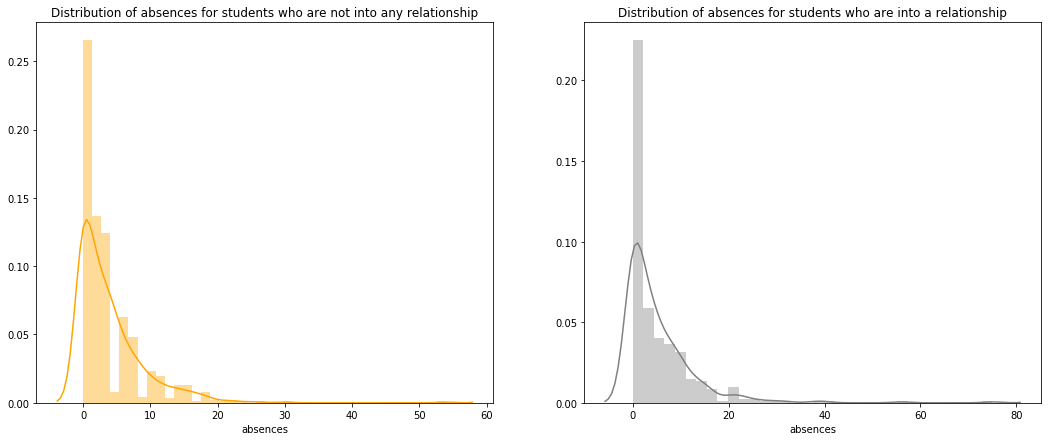

In [57]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(df[(df.romantic == 'no')]["absences"],color='orange',ax=ax)
ax.set_title('Distribution of absences for students who are not into any relationship')

ax=f.add_subplot(122)
sns.distplot(df[(df.romantic == 'yes')]['absences'],color='gray',ax=ax)
ax.set_title('Distribution of absences for students who are into a relationship')

In [54]:
#independent t test
import random
l=random.sample(set(df[(df.romantic == 'yes')]['absences']),20)
x_1 = sum(l)/len(l);
s_1 = np.std(l)
print(x_1,s_1)

17.5 16.2680668796


In [55]:
l=random.sample(set(df[(df.romantic == 'no')]['absences']),20)
x_1 = sum(l)/len(l);
s_1 = np.std(l)
print(x_1,s_1)

14.45 7.07442577175


In [33]:
DF = (20-1)+(20-1)

 with alpha = 0.05, df=38 , t-value (two-tailed): +/- 2.02439416 

computed value of t is 0.1130

Hence, H0 is accepted.
so, there is no significat difference in no of absence ...

Text(0.5,1,'Distribution of grades for people who consume little alcohol on weekdays')

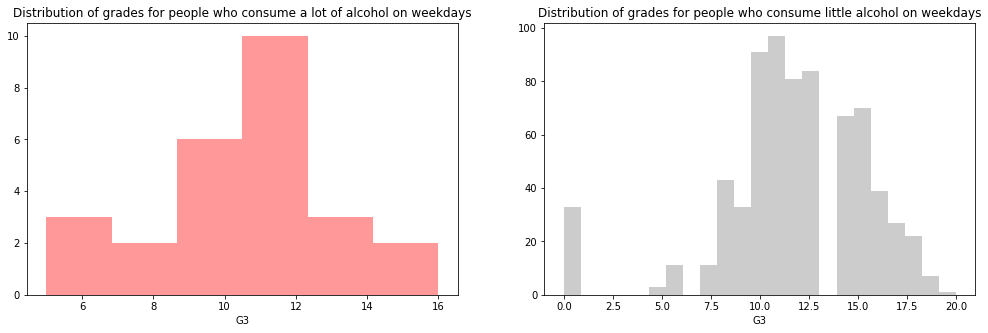

In [73]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.Dalc == 5)]["G3"],color='red',ax=ax,kde=False)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays')

ax=f.add_subplot(122)
sns.distplot(df[(df.Dalc == 1)]['G3'],color='gray',ax=ax,kde=False)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays')

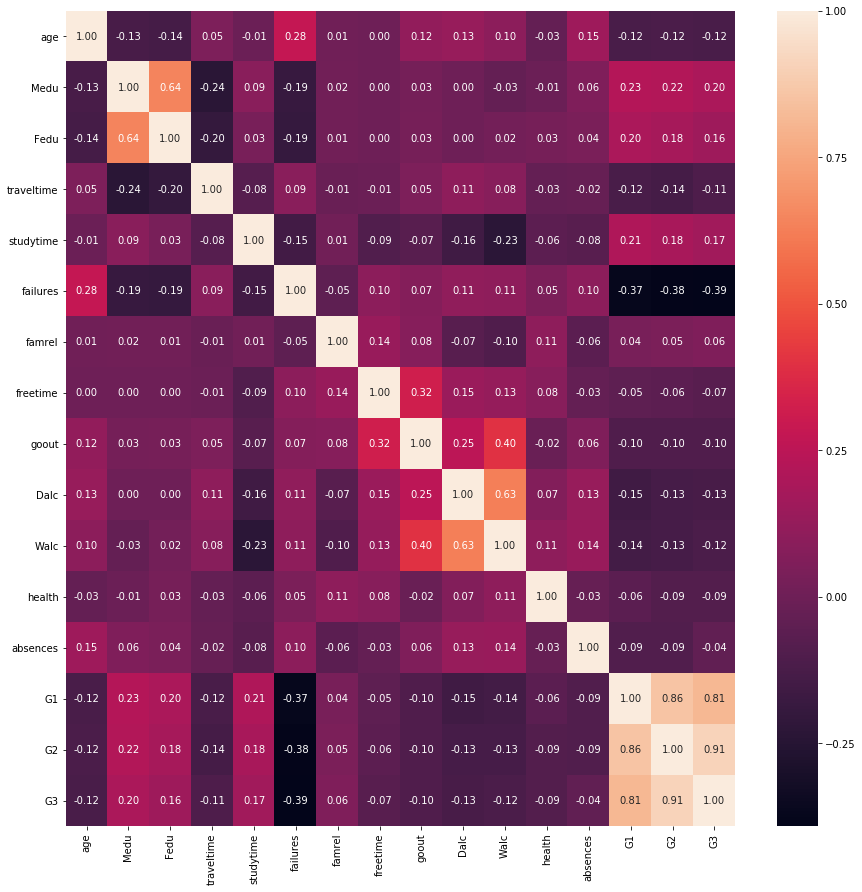

In [5]:

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)